In [51]:
from pathlib import Path
import yaml

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [86]:
def plot_scores_lrs(ax, scores: np.ndarray, llrs: np.ndarray, labels: dict):
    "Make subplot with random color"
    r = np.round(np.random.rand(),1)
    g = np.round(np.random.rand(),1)
    b = np.round(np.random.rand(),1)
    ax.scatter(scores, llrs, marker='.', color=[r,g,b], label=labels[group])
   

In [58]:
def get_pairing_properties(experiment_folder: Path, group: str):
    run_folder = list(experiment_folder.glob(f'{group}_*'))
    if len(run_folder) > 1:
        print(f"Found more than 1 possible output folder for run group {group}:\n'\n'.join(run_folder)")
        return None
    elif len(run_folder) == 0:
        print(f"Found no possible output folder for run group {group} in directory {experiment_folder}")
        return None
    else:
        f = run_folder[0] / 'run_config.yaml'
        props = yaml.safe_load(f.read_text())
        return props['pairing_properties']

In [100]:
# Veel regels data, voor plotten is in principe maar 1 punt per score nodig
def downsample(data):
    "Downsample to unique rounded scores"
    data['round_score'] = data['normalized_score'].apply(lambda x: round(x))
    downsampled = calibration_results.groupby(['run', 'round_score']).first()
    return downsampled.reset_index()

In [39]:
experiment_folder = Path('./output/2024-05-15_12-21-33')
calibration_results_path = experiment_folder / 'calibration_results.csv'

In [61]:
calibration_results = pd.read_csv(calibration_results_path)
calibration_results['llrs'] = calibration_results['lr'].apply(lambda x: np.log10(x))

In [57]:
distinct_groups = calibration_results['run'].unique()
groups_with_labels = {group: get_pairing_properties(experiment_folder, group) for group in distinct_groups}

In [59]:
groups_with_labels

{0: "({'auto': 'nee', 'beller_fluistert': 'nee'}, {'auto': 'nee', 'beller_fluistert': 'nee'})",
 1: "({'auto': 'ja', 'beller_fluistert': 'nee'}, {'auto': 'nee', 'beller_fluistert': 'nee'})",
 2: "({'auto': 'ja', 'beller_fluistert': 'nee'}, {'auto': 'ja', 'beller_fluistert': 'nee'})"}

In [102]:
downsampled_data = downsample(calibration_results)

In [105]:
plot_groups = distinct_groups # distinct_groups to plot all, otherwise array with one or multiple group ID's (run number)
data = downsampled_data # downsampled_data or calibration_results. Downsampled data speeds things up

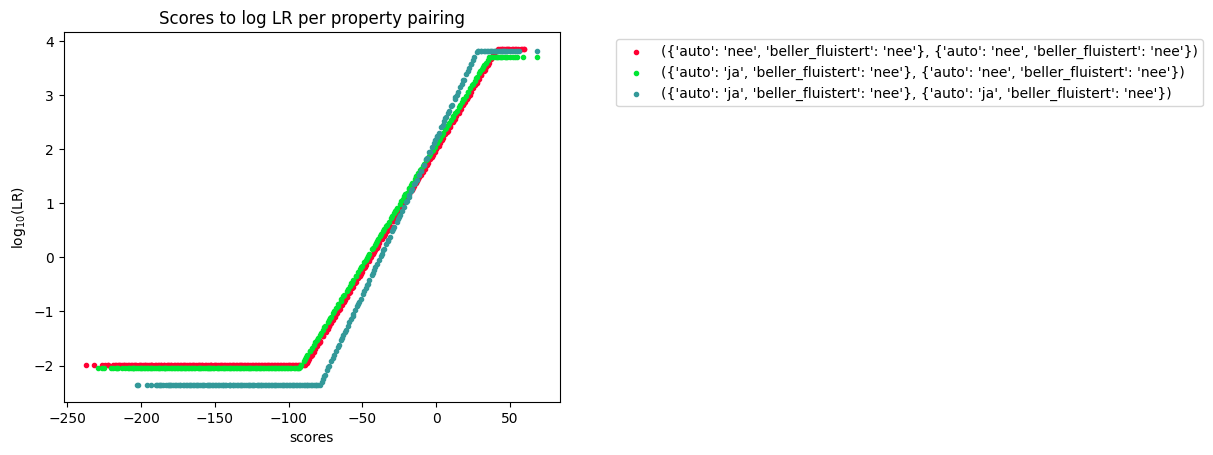

In [104]:
fig = plt.figure()
plt.title("Scores to log10 LR per property pairing")
ax = plt.subplot()
plt.xlabel('scores')
plt.ylabel('log$_{10}$(LR)')
for group in plot_groups:
    scores = np.array(data[data['run'] == group]['normalized_score'])
    llrs = np.array(data[data['run'] == group]['llrs'])
    plot_scores_lrs(ax, scores, llrs, groups_with_labels)
ax.legend(bbox_to_anchor=(1.1, 1))